<img src="https://lh3.googleusercontent.com/drive-viewer/AJc5JmT3-KppjOXJ81Wj6MqcvqmKe2VbLzFP2fJRaXQSvPXxO4JfPi9jrca4-m6yfYWEYZm38rE0M30=w3584-h1706" ><br>





# PROYECTO FINAL - TERCERA ENTREGA - KMEANS

Integrantes:

Juan Sebastian Alvarez Eraso

Rafael Camilo Tejon Rojas

Oscar Javier Angel Balcázar

**Objetivos**

- Finalizar las actividades de entendimiento de los datos y enfoque analítico así como el alcance general del proyecto.
- Realizar la preparación de datos requerida para la construcción de un modelo basado en machine learning.
- Entrenar un primer modelo de machine learning a partir del enfoque analítico
definido y realizar una primera evaluación de resultados.

**Tercer sprint del proyecto**

● El proyecto se debe enfocar en la preparación de datos y construcción
de un primer modelo predictivo o explicativo basado en regresión, clasificación o alguna otra técnica analítica previamente discutida con los docentes. 



# **Problemática seleccionada**

Después de una investigación en diferentes temáticas seleccionamos un dataset con datos de hurtos de la ciudad de Medellín.

**Descripción del dataset:**

Para este taller se utilizarán el dataset de hurtos registrados por la Policía Nacional en la ciudad de Medellín cometidos contra personas en espacio público.

**Diccionario de datos:**

| Nombre | Tipo |Descripción |
|--------|------|------------|
| SEXO | string  | Sexo de la víctima, o cuando lo que se mide es la comisión de un delito del presunto indiciado.|
| EDAD | number |	Edad de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado.|
| ESTADO_CIVIL | string  | Estado civil de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado.|
| GRUPO_ACTOR | string  | Grupo de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado, por ejemplo: Guerrilla, Paramilitares etc.|
| ACTIVIDAD_DELICTIVA | string  | Actividad ilegal a la que se dedica la víctima o el presunto indiciado. Mirar en contexto con conducta.|
| PARENTESCO | string  | Parentesco entre la víctima y el presunto indiciado.|
| OCUPACION | string  | Ocupación de la víctima o del presunto indiciado, Mirar en contexto con conducta.|
| DISCAPACIDAD | string  | Condición de movilidad reducida de la víctima o indiciado.|
| GRUPO_ESPECIAL | string  | Indica grupos especiales, que están asociados de por vida a la persona y que hacen que sean más vulnerables a un hecho en particular.|
| MEDIO_TRANSPORTE | string  | Medio de transporte donde se movilizaba la víctima o el presunto indiciado según el caso.|
| NIVEL_ACADEMICO | string  | Nivel académico de la víctima o el presunto indiciado según el caso.|
| TESTIGO | string  | Indica si hubo o no un testigo de los hechos.|
| NOMBRE_BARRIO | string  | Nombre del barrio donde ocurrieron los hechos.|
| CODIGO_BARRIO | string  | Código del barrio donde ocurrieron los hechos.|
| CODIGO_COMUNA | string  | Código de la comuna donde ocurrieron los hechos.|
| LUGAR | string  | Lugar donde ocurrieron los hechos. El lugar es una tipificación del urbanismo más cercano al hecho.|
| SEDE_RECEPTORA | string  | Entidad que recepcionó el caso.|
| CONDUCTA | string  | Es el inventario de indicadores o hechos asociados a la seguridad y convivencia.|
| MODALIDAD | string  | Es la forma como se materializa el hecho.|
| CARACTERIZACION | string  | Variable que permite analizar y tipificar la conducta.|
| CONDUCTA_ESPECIAL | string  | Una forma de caracterización adicional.|
| ARMA_MEDIO | string  | Es el arma, medio o mecanísmo con el que se comete el hecho.|
| ARTICULO_PENAL | string  | Artículos del código penal o del código de contravenciones de Policía.|
| CATEGORIA_PENAL | string  | Caracterización de algunos tipos penales.|
| BIEN | string  | Nombre del bien.|
| CATEGORIA_BIEN | string  | Agrupación de bienes, nivel intermedio de agregación.|
| GRUPO_BIEN | string  | Agrupación de bienes, nivel alto de agregación.|
| MODELO | string  | Modelo del bien.|
| COLOR | string  | Color del bien.|
| PERMISO | string  | Tipo de permiso de porte que tiene el bien.|
| UNIDAD_MEDIDA | string  | Unidad del bien.|
| FECHA_HECHO	| date | Fecha en que ocurrió el hecho.|
| LATITUD	| number |	Latitud geográfica sistema de coordenadas wgs84	|
| LONGITUD | number |	Longitud geográfica sistema de coordenadas wgs84	|
| CASO | number |	1: Indicará el caso, 0: Podría indicar bienes o persona, dependiendo de la conducta que se busca analizar, es decir si el hecho es contra la vida y la integridad personal o es contra el patrimonio.|
| VALOR | number |	Valor de uso del bien.|
| CANTIDAD | number |	Cantidad que debe ser entendida en el contexto de la unidad de medida.|

# **Lectura y análisis del dataset**

## Importar librerías

In [116]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [56]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.5.post1
Uninstalling Shapely-1.8.5.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.5.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? Y
  Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Shapely-1.8.5.post1.tar.gz (200 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669758 sha256=9a894c6e60dc61f486319281600d961c5f414ac0e61d3741ed6d1f57e4371f9d
  Stored in directory: /root/.cache/pip/wheels/a3/07/7c/cc50e8ecc795963726466b22ecd395ee1e2a28da87a4cdeb56
Successfully built shapely


In [59]:
%matplotlib inline

In [60]:
import pandas as pd
from pandas_profiling import ProfileReport
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans

import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import joblib

import calendar

# Configuración de pandas para extender el número de filas y columnas en la visualización
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Lectura del dataset

In [61]:
# Loading the CSV file as dataframe
med_hurto_df = pd.read_csv('https://raw.githubusercontent.com/juanalvarez123/MINE-4101-proyecto-final/main/data/hurto_a_persona_medellin.csv', delimiter=";", error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.



In [62]:
med_hurto_df.shape

(280870, 31)

In [63]:
med_hurto_df.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,parentesco,medio_transporte,nivel_academico,testigo,conducta,modalidad,caracterizacion,conducta_especial,arma_medio,articulo_penal,categoria_penal,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2012-01-01T14:00:00.000-05:00,1.0,6.231.846,-75.553.096,Hombre,32,Soltero(a),Sin dato,Automóvil,Sin dato,Sin dato,Hurto a persona,Descuido,Sin dato,Sin dato,No,Sin dato,Sin dato,Cataluña,#0909,9,Vía pública,Villa Hermosa,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
1,2012-01-01T17:00:00.000-05:00,1.0,6.240.398,-75.553.902,Hombre,22,Soltero(a),Sin dato,Sin dato,Sin dato,Sin dato,Hurto a persona,Raponazo,Sin dato,Sin dato,No,Sin dato,Sin dato,Buenos Aires,#0907,9,Vía pública,Villa Hermosa,Accesorios prendas de vestir,Prendas de vestir y accesorios,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
2,2012-01-01T19:00:00.000-05:00,1.0,6.283.231,-75.563.025,Hombre,30,Soltero(a),Sin dato,Caminata,Sin dato,Sin dato,Hurto a persona,Atraco,Sin dato,Sin dato,Arma de fuego,Sin dato,Sin dato,Aranjuez,#0413,4,Vía pública,Aranjuez,Billetera,Prendas de vestir y accesorios,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
3,2012-01-01T08:00:00.000-05:00,1.0,6.266.206,-75.552.739,Hombre,22,Soltero(a),Sin dato,Motocicleta,Sin dato,Sin dato,Hurto a persona,Descuido,Sin dato,Sin dato,No,Sin dato,Sin dato,Manrique Central No.2,#0307,3,Parqueadero,Manrique,Autopartes,Autoparte y elementos de la mecánica automotriz,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00
4,2012-01-01T10:30:00.000-05:00,1.0,6.248.981,-75.621.441,Hombre,29,Soltero(a),Sin dato,Caminata,Sin dato,Sin dato,Hurto a persona,Descuido,Sin dato,Sin dato,No,Sin dato,Sin dato,Las Independencias,#1314,13,Residencia,San Javier,Cédula,Documentos,Mercancía,-1,Sin dato,Sin dato,Sin dato,2022-08-26T15:54:41.000-05:00



***Tipos de Variables***


| Nombre | Tipo de Variable|
|--------|---------|
| SEXO | Cualitativa Nominal|
| EDAD | Cuantitativa Continua  |
| ESTADO_CIVIL | Cualitativa Nominal |
| GRUPO_ACTOR | Cualitativa Nominal|
| ACTIVIDAD_DELICTIVA | Cualitativa Nominal|
| PARENTESCO | Cualitativa Nominal|
| OCUPACION | Cualitativa Nominal|
| DISCAPACIDAD | Cualitativa Nominal|
| GRUPO_ESPECIAL | Cualitativa Nominal|
| MEDIO_TRANSPORTE | Cualitativa Nominal|
| NIVEL_ACADEMICO | Cualitativa Ordinal|
| TESTIGO | Cualitativa Nominal|
| NOMBRE_BARRIO | Cualitativa Nominal|
| CODIGO_BARRIO | Cualitativa Nominal|
| CODIGO_COMUNA | Cualitativa Ordinal|
| LUGAR | Cualitativa Nominal|
| SEDE_RECEPTORA | Cualitativa Nominal|
| CONDUCTA | Cualitativa Nominal|
| MODALIDAD | Cualitativa Nominal|
| CARACTERIZACION | Cualitativa Nominal|
| CONDUCTA_ESPECIAL | Cualitativa Nominal|
| ARMA_MEDIO | Cualitativa Nominal|
| ARTICULO_PENAL | Cualitativa Nominal|
| CATEGORIA_PENAL | Cualitativa Nominal|
| BIEN | Cualitativa Nominal|
| CATEGORIA_BIEN | Cualitativa Nominal|
| GRUPO_BIEN | Cualitativa Nominal|
| MODELO | Cualitativa Nominal|
| COLOR | Cualitativa Nominal|
| PERMISO | Cualitativa Nominal|
| UNIDAD_MEDIDA | Cualitativa Nominal|
| FECHA_HECHO	| Cualitativa Ordinal|
| LATITUD	| Cuantitativa Continua|
| LONGITUD	| Cuantitativa Continua|
| CASO | Cualitativa Nominal|
| VALOR | Cualitativa Ordinal|
| CANTIDAD | Cualitativa Ordinal|

# ****Limpieza de datos****

A continuación se eliminarán las variables nulas del dataframe o columnas que tienen un único valor constante como la cantidad de objetos hurtados que siempre es uno dentro del archivo.

In [64]:
med_hurto_df = med_hurto_df.drop(['cantidad', 'parentesco', 'nivel_academico', 'testigo', 'conducta', 'caracterizacion', 'modelo', 'grupo_bien'], axis=1)
med_hurto_df = med_hurto_df.drop(['articulo_penal', 'categoria_penal', 'permiso', 'unidad_medida', 'fecha_ingestion', 'color'], axis=1)
med_hurto_df.shape

(280870, 17)

Se cambia el tipo de dato de la columna "codigo_columna" a string ya que algunos datos los toma como númericos y otros cómo cadena de texto siendo los mismos.

In [65]:
med_hurto_df['codigo_comuna'] = med_hurto_df['codigo_comuna'].astype(str)
comunas = med_hurto_df.codigo_comuna.unique()
comunas

array(['9', '4', '3', '13', '10', '11', '5', '6', '2', '16', '14', '8',
       '7', '12', '1', '15', 'SIN DATO', '90', '80', '70', '60', '50'],
      dtype=object)

Se transformaron a minúsculas todas las columnas para evitar tener algunos barrios/localidades en mayúsculas y minúsculas y obtener datos errados en otra posible categoría.

In [66]:
med_hurto_df['codigo_comuna'] = med_hurto_df['codigo_comuna'].str.lower()
med_hurto_df['codigo_comuna'] = med_hurto_df['codigo_comuna'].str.strip()
med_hurto_df['sexo'] = med_hurto_df['sexo'].str.lower()
med_hurto_df['sexo'] = med_hurto_df['sexo'].str.strip()
med_hurto_df['estado_civil'] = med_hurto_df['estado_civil'].str.lower()
med_hurto_df['estado_civil'] = med_hurto_df['estado_civil'].str.strip()
med_hurto_df['nombre_barrio'] = med_hurto_df['nombre_barrio'].str.lower()
med_hurto_df['nombre_barrio'] = med_hurto_df['nombre_barrio'].str.strip()
med_hurto_df['arma_medio'] = med_hurto_df['arma_medio'].str.lower()
med_hurto_df['arma_medio'] = med_hurto_df['arma_medio'].str.strip()
med_hurto_df['medio_transporte'] = med_hurto_df['medio_transporte'].str.lower()
med_hurto_df['medio_transporte'] = med_hurto_df['medio_transporte'].str.strip()
med_hurto_df['modalidad'] = med_hurto_df['modalidad'].str.lower()
med_hurto_df['modalidad'] = med_hurto_df['modalidad'].str.strip()
med_hurto_df['codigo_barrio'] = med_hurto_df['codigo_barrio'].str.lower()
med_hurto_df['codigo_barrio'] = med_hurto_df['codigo_barrio'].str.strip()
med_hurto_df['lugar'] = med_hurto_df['lugar'].str.lower()
med_hurto_df['lugar'] = med_hurto_df['lugar'].str.strip()
med_hurto_df['bien'] = med_hurto_df['bien'].str.lower()
med_hurto_df['bien'] = med_hurto_df['bien'].str.strip()
med_hurto_df['categoria_bien'] = med_hurto_df['categoria_bien'].str.lower()
med_hurto_df['categoria_bien'] = med_hurto_df['categoria_bien'].str.strip()
med_hurto_df['bien'] = med_hurto_df['bien'].replace('peso','efectivo')

In [67]:
med_hurto_df = med_hurto_df[(med_hurto_df['codigo_comuna'] != 'sin dato')]
med_hurto_df = med_hurto_df[(med_hurto_df['codigo_barrio'] != 'sin dato 90 santa elena')
& (med_hurto_df['codigo_barrio'] != 'sin dato 60 san cristobal')
& (med_hurto_df['codigo_barrio'] != 'sin dato 80 san antonio de prado')
& (med_hurto_df['codigo_barrio'] != 'sin dato 10 la candelaria')]

# ****Preparación de los datos****

In [68]:
# Se estadarizan las cadenas que tenemos como fechas para poder transformarlas correctamente
med_hurto_df['fecha_hecho'] = pd.to_datetime(med_hurto_df['fecha_hecho'], format='%Y-%m-%d')
med_hurto_df['fecha_hecho'] = med_hurto_df['fecha_hecho'].dt.floor('d')
med_hurto_df['dia_semana'] = med_hurto_df['fecha_hecho'].dt.dayofweek
med_hurto_df['num_dia_semana'] = med_hurto_df['fecha_hecho'].dt.dayofweek
med_hurto_df['num_mes'] = med_hurto_df['fecha_hecho'].dt.month
med_hurto_df['dia_semana'] = med_hurto_df['fecha_hecho'].apply(lambda x: calendar.day_name[x.weekday()])

In [69]:
# Se agrega un nuevo feature para saber si esa fecha correspondía a un día festivo
festivos_colombia_df = pd.read_csv('https://raw.githubusercontent.com/juanalvarez123/MINE-4101-proyecto-final/main/data/festivos_colombia_v2.csv')
festivos_colombia_df['fecha'] = pd.to_datetime(festivos_colombia_df['fecha'])

In [70]:
med_hurto_df['codigo_barrio'] = med_hurto_df['codigo_barrio'].apply(lambda x: x.replace('#', ''))

In [71]:
# Se agruparon las modalidades de robo en modalidades peligoras y no peligrosas
modalidades_peligrosas = ['atraco', 'rompimiento de ventana', 'escopolamina', 'fleteo', 'tóxico o agente químico', 'miedo o terror', 'vandalismo', 'forcejeo', 'halado', 'rompimiento cerraduta']

In [72]:
# Se agruparon en tres categorias las modalidades de transporte
transporte_publico = ['taxi', 'autobus', 'metro']
transporte_particular = ['automóvil', 'motocicleta', 'bicicleta']
via_publica = ['motocicleta con parrillero', 'caminata']

In [73]:
# Se define una lista de las armas que se consideran como peligrosas a partir de esta se agrega una nueva columna en el dataframe
armas_peligrosas = ['arma de fuego', 'objeto contundente', 'arma cortopunzante', 'escopolamina', 'tóxico o agente químico']

In [74]:
med_hurto_df.head()

,fecha_hecho,latitud,longitud,sexo,edad,estado_civil,medio_transporte,modalidad,conducta_especial,arma_medio,nombre_barrio,codigo_barrio,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,dia_semana,num_dia_semana,num_mes
0,2012-01-01 00:00:00-05:00,6.231.846,-75.553.096,hombre,32,soltero(a),automóvil,descuido,Sin dato,no,cataluña,0909,9,vía pública,Villa Hermosa,efectivo,"dinero, joyas, piedras preciosas y título valor",Sunday,6,1
1,2012-01-01 00:00:00-05:00,6.240.398,-75.553.902,hombre,22,soltero(a),sin dato,raponazo,Sin dato,no,buenos aires,0907,9,vía pública,Villa Hermosa,accesorios prendas de vestir,prendas de vestir y accesorios,Sunday,6,1
2,2012-01-01 00:00:00-05:00,6.283.231,-75.563.025,hombre,30,soltero(a),caminata,atraco,Sin dato,arma de fuego,aranjuez,0413,4,vía pública,Aranjuez,billetera,prendas de vestir y accesorios,Sunday,6,1
3,2012-01-01 00:00:00-05:00,6.266.206,-75.552.739,hombre,22,soltero(a),motocicleta,descuido,Sin dato,no,manrique central no.2,0307,3,parqueadero,Manrique,autopartes,autoparte y elementos de la mecánica automotriz,Sunday,6,1
4,2012-01-01 00:00:00-05:00,6.248.981,-75.621.441,hombre,29,soltero(a),caminata,descuido,Sin dato,no,las independencias,1314,13,residencia,San Javier,cédula,documentos,Sunday,6,1


# Conteo de variables

En esta seccion se hace una agrupación de las características de los grupos a nivel de barrios.

In [75]:
# Conteo de hurtos totales en el barrio
med_hurto_group_df = med_hurto_df.groupby(['codigo_comuna', 'codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
med_hurto_group_df = med_hurto_group_df.reset_index(name='hurtos')

In [76]:
# Conteo de hurtos de modalidades peligrosas en el barrio
hurtos_peligrosos = med_hurto_df[med_hurto_df['modalidad'].isin(modalidades_peligrosas)] 
hurtos_peligrosos = hurtos_peligrosos.groupby(['codigo_comuna', 'codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
hurtos_peligrosos = hurtos_peligrosos.reset_index(name='hurtos_peligrosos')
hurtos_peligrosos

,codigo_comuna,codigo_barrio,hurtos_peligrosos
0,10,1019,14564
1,10,1013,3657
2,10,1001,3338
3,10,1018,3226
4,10,1006,2907
...,...,...,...
323,50,5002,3
324,60,6002,3
325,50,5008,2
326,50,5001,1


In [77]:
# Conteo de hurtos de modalidades peligrosas en el barrio
hurtos_no_peligrosos = med_hurto_df[~med_hurto_df['modalidad'].isin(modalidades_peligrosas)] 
hurtos_no_peligrosos = hurtos_no_peligrosos.groupby(['codigo_comuna', 'codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
hurtos_no_peligrosos = hurtos_no_peligrosos.reset_index(name='hurtos_no_peligrosos')
hurtos_no_peligrosos

,codigo_comuna,codigo_barrio,hurtos_no_peligrosos
0,10,1019,18025
1,14,1418,4138
2,10,1007,3772
3,10,1013,2582
4,10,1006,2221
...,...,...,...
320,60,6005,2
321,80,8004,2
322,50,5006,1
323,50,5003,1


In [78]:
# Conteo de hurtos a mujeres en el barrio
hurtos_mujeres = med_hurto_df[~med_hurto_df['sexo'].isin(['mujer'])] 
hurtos_mujeres = hurtos_mujeres.groupby(['codigo_comuna', 'codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
hurtos_mujeres = hurtos_mujeres.reset_index(name='hurtos_a_mujeres')
hurtos_mujeres

,codigo_comuna,codigo_barrio,hurtos_a_mujeres
0,10,1019,17142
1,14,1418,4298
2,10,1018,3312
3,10,1006,3299
4,10,1007,3165
...,...,...,...
322,50,5004,4
323,60,6002,4
324,50,5006,2
325,50,5008,2


In [79]:
# Conteo de hurtos a hombre en el barrio
hurtos_hombre = med_hurto_df[~med_hurto_df['sexo'].isin(['hombre'])] 
hurtos_hombre = hurtos_hombre.groupby(['codigo_comuna', 'codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
hurtos_hombre = hurtos_hombre.reset_index(name='hurtos_a_hombres')
hurtos_hombre

,codigo_comuna,codigo_barrio,hurtos_a_hombres
0,10,1019,15583
1,10,1013,3159
2,10,1007,3154
3,14,1418,2838
4,10,1001,2053
...,...,...,...
320,50,5003,1
321,70,7008,1
322,60,6003,1
323,60,ae3,1


In [80]:
# Conteo de hurtos en transporte público en el barrio
hurtos_transporte_publico = med_hurto_df[~med_hurto_df['medio_transporte'].isin(transporte_publico)] 
hurtos_transporte_publico = hurtos_transporte_publico.groupby(['codigo_comuna', 'codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
hurtos_transporte_publico = hurtos_transporte_publico.reset_index(name='hurtos_en_transporte_publico')
hurtos_transporte_publico

,codigo_comuna,codigo_barrio,hurtos_en_transporte_publico
0,10,1019,29084
1,14,1418,6697
2,10,1007,5486
3,10,1013,5425
4,10,1018,4765
...,...,...,...
324,50,5007,4
325,50,5008,2
326,50,5003,1
327,50,5001,1


In [81]:
# Conteo de hurtos en transporte particular en el barrio
hurtos_transporte_particular = med_hurto_df[~med_hurto_df['medio_transporte'].isin(transporte_particular)] 
hurtos_transporte_particular = hurtos_transporte_particular.groupby(['codigo_comuna', 'codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
hurtos_transporte_particular = hurtos_transporte_particular.reset_index(name='hurtos_en_transporte_particular')
hurtos_transporte_particular

,codigo_comuna,codigo_barrio,hurtos_en_transporte_particular
0,10,1019,31508
1,14,1418,6427
2,10,1007,5962
3,10,1013,5712
4,10,1018,4734
...,...,...,...
323,50,5007,3
324,50,5002,2
325,50,5003,1
326,50,5001,1


In [82]:
# Conteo de hurtos en vía publica en el barrio
hurtos_via_publica = med_hurto_df[~med_hurto_df['medio_transporte'].isin(via_publica)] 
hurtos_via_publica = hurtos_via_publica.groupby(['codigo_comuna', 'codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
hurtos_via_publica = hurtos_via_publica.reset_index(name='hurtos_en_via_publica')
hurtos_via_publica

,codigo_comuna,codigo_barrio,hurtos_en_via_publica
0,10,1019,6165
1,10,1013,1571
2,11,1108,1489
3,11,1105,1444
4,14,1418,1441
...,...,...,...
319,70,7006,2
320,80,8006,2
321,80,8004,2
322,50,5006,1


In [83]:
# Conteo de hurtos a niños en el barrio
hurtos_niños = med_hurto_df[med_hurto_df['edad']<12] 
hurtos_niños = hurtos_niños.groupby(['codigo_comuna', 'codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
hurtos_niños = hurtos_niños.reset_index(name='hurtos_niños')
hurtos_niños

,codigo_comuna,codigo_barrio,hurtos_niños
0,10,1019,334
1,14,1418,173
2,10,inst_17,88
3,16,1603,72
4,10,1007,72
...,...,...,...
257,60,6012,1
258,80,ae7,1
259,8,0804,1
260,50,5001,1


In [84]:
# Conteo de hurtos a jovenes en el barrio
hurtos_jovenes = med_hurto_df[(med_hurto_df['edad']>=12) & (med_hurto_df['edad']<=18)] 
hurtos_jovenes = hurtos_jovenes.groupby(['codigo_comuna', 'codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
hurtos_jovenes = hurtos_jovenes.reset_index(name='hurtos_jovenes')
hurtos_jovenes

,codigo_comuna,codigo_barrio,hurtos_jovenes
0,10,1019,1339
1,10,1018,217
2,10,1013,216
3,11,inst_14,199
4,10,1006,184
...,...,...,...
268,8,0815,1
269,60,6014,1
270,11,inst_13,1
271,70,ae5,1


In [85]:
# Conteo de hurtos a adultos en el barrio
hurtos_adultos = med_hurto_df[(med_hurto_df['edad']>=19) & (med_hurto_df['edad']<=60)] 
hurtos_adultos = hurtos_adultos.groupby(['codigo_comuna', 'codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
hurtos_adultos = hurtos_adultos.reset_index(name='hurtos_adultos')
hurtos_adultos

,codigo_comuna,codigo_barrio,hurtos_adultos
0,10,1019,29033
1,14,1418,6521
2,10,1013,5707
3,10,1007,5700
4,10,1006,4605
...,...,...,...
323,50,5006,4
324,60,6008,3
325,50,5008,2
326,50,5003,1


In [86]:
# Conteo de hurtos a adultos mayores en el barrio
hurtos_adultos_mayores = med_hurto_df[med_hurto_df['edad']>=61] 
hurtos_adultos_mayores = hurtos_adultos_mayores.groupby(['codigo_comuna','codigo_barrio'], sort=False)['fecha_hecho'].count().sort_values(ascending=False)
hurtos_adultos_mayores = hurtos_adultos_mayores.reset_index(name='hurtos_adultos_mayores')
hurtos_adultos_mayores

,codigo_comuna,codigo_barrio,hurtos_adultos_mayores
0,10,1019,1883
1,10,1007,356
2,10,1006,304
3,10,1018,300
4,10,1013,257
...,...,...,...
284,13,1315,1
285,90,9004,1
286,7,0705,1
287,80,8003,1


In [87]:
med_hurto_group_df

,codigo_comuna,codigo_barrio,hurtos
0,10,1019,32589
1,14,1418,7033
2,10,1007,6296
3,10,1013,6239
4,10,1006,5128
...,...,...,...
324,50,5006,4
325,50,5008,2
326,50,5003,1
327,50,5001,1


In [88]:
# Se juntan las agrupaciones de los barrios
med_hurtos_groups = pd.merge(med_hurto_group_df, hurtos_peligrosos, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups = pd.merge(med_hurtos_groups, hurtos_no_peligrosos, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups = pd.merge(med_hurtos_groups, hurtos_mujeres, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups = pd.merge(med_hurtos_groups, hurtos_hombre, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups = pd.merge(med_hurtos_groups, hurtos_transporte_publico, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups = pd.merge(med_hurtos_groups, hurtos_transporte_particular, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups = pd.merge(med_hurtos_groups, hurtos_via_publica, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups = pd.merge(med_hurtos_groups, hurtos_niños, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups = pd.merge(med_hurtos_groups, hurtos_jovenes, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups = pd.merge(med_hurtos_groups, hurtos_adultos, how='left', on=['codigo_comuna','codigo_barrio'])
med_hurtos_groups = pd.merge(med_hurtos_groups, hurtos_adultos_mayores, how='left', on=['codigo_comuna','codigo_barrio'])

In [89]:
med_hurtos_groups = med_hurtos_groups.fillna(0)
med_hurtos_groups

,codigo_comuna,codigo_barrio,hurtos,hurtos_peligrosos,hurtos_no_peligrosos,hurtos_a_mujeres,hurtos_a_hombres,hurtos_en_transporte_publico,hurtos_en_transporte_particular,hurtos_en_via_publica,hurtos_niños,hurtos_jovenes,hurtos_adultos,hurtos_adultos_mayores
0,10,1019,32589,14564.0,18025.0,17142.0,15583.0,29084,31508.0,6165.0,334.0,1339.0,29033.0,1883.0
1,14,1418,7033,2895.0,4138.0,4298.0,2838.0,6697,6427.0,1441.0,173.0,155.0,6521.0,184.0
2,10,1007,6296,2524.0,3772.0,3165.0,3154.0,5486,5962.0,1335.0,72.0,168.0,5700.0,356.0
3,10,1013,6239,3657.0,2582.0,3105.0,3159.0,5425,5712.0,1571.0,59.0,216.0,5707.0,257.0
4,10,1006,5128,2907.0,2221.0,3299.0,1841.0,4654,4670.0,1203.0,35.0,184.0,4605.0,304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,50,5006,4,3.0,1.0,2.0,2.0,4,3.0,1.0,0.0,0.0,4.0,0.0
325,50,5008,2,2.0,0.0,2.0,0.0,2,0.0,2.0,0.0,0.0,2.0,0.0
326,50,5003,1,0.0,1.0,0.0,1.0,1,1.0,0.0,0.0,0.0,1.0,0.0
327,50,5001,1,1.0,0.0,1.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0


In [90]:
med_hurtos_groups.to_csv('med_hurtos_groups.csv')

# ****Construcción del modelo****

In [91]:
med_hurtos_groups.columns

Index(['codigo_comuna', 'codigo_barrio', 'hurtos', 'hurtos_peligrosos',
       'hurtos_no_peligrosos', 'hurtos_a_mujeres', 'hurtos_a_hombres',
       'hurtos_en_transporte_publico', 'hurtos_en_transporte_particular',
       'hurtos_en_via_publica', 'hurtos_niños', 'hurtos_jovenes',
       'hurtos_adultos', 'hurtos_adultos_mayores'],
      dtype='object')

In [92]:
# NO seleccionamos ni el código de la comuna ni el código del barrio ya que no queremos sesgar al modelo
features = ['hurtos_peligrosos', 'hurtos_no_peligrosos', 'hurtos_a_mujeres', 'hurtos_a_hombres', 'hurtos_en_transporte_publico',
            'hurtos_en_transporte_particular', 'hurtos_en_via_publica', 'hurtos_niños', 'hurtos_jovenes', 'hurtos_adultos',
            'hurtos_adultos_mayores', 'hurtos']

In [93]:
med_hurtos_groups[features].corr()

,hurtos_peligrosos,hurtos_no_peligrosos,hurtos_a_mujeres,hurtos_a_hombres,hurtos_en_transporte_publico,hurtos_en_transporte_particular,hurtos_en_via_publica,hurtos_niños,hurtos_jovenes,hurtos_adultos,hurtos_adultos_mayores,hurtos
hurtos_peligrosos,1.000000,0.958387,0.992110,0.977031,0.989780,0.980093,0.973751,0.921062,0.961228,0.989011,0.961464,0.988325
hurtos_no_peligrosos,0.958387,1.000000,0.981908,0.993825,0.988369,0.994678,0.930054,0.929168,0.969584,0.989885,0.982436,0.990693
hurtos_a_mujeres,0.992110,0.981908,1.000000,0.986895,0.997605,0.992909,0.966199,0.939293,0.970356,0.997499,0.972465,0.997116
hurtos_a_hombres,0.977031,0.993825,0.986895,1.000000,0.994600,0.997128,0.948278,0.925387,0.974547,0.995660,0.987264,0.996286
hurtos_en_transporte_publico,0.989780,0.988369,0.997605,0.994600,1.000000,0.996928,0.960181,0.937364,0.974046,0.999460,0.980750,0.999453
hurtos_en_transporte_particular,0.980093,0.994678,0.992909,0.997128,0.996928,1.000000,0.943829,0.926863,0.980492,0.997495,0.987579,0.998202
hurtos_en_via_publica,0.973751,0.930054,0.966199,0.948278,0.960181,0.943829,1.000000,0.926249,0.908786,0.963031,0.919151,0.960687
hurtos_niños,0.921062,0.929168,0.939293,0.925387,0.937364,0.926863,0.926249,1.000000,0.873597,0.936778,0.891137,0.935091
hurtos_jovenes,0.961228,0.969584,0.970356,0.974547,0.974046,0.980492,0.908786,0.873597,1.000000,0.973497,0.968779,0.975814
hurtos_adultos,0.989011,0.989885,0.997499,0.995660,0.999460,0.997495,0.963031,0.936778,0.973497,1.000000,0.980518,0.999896


In [94]:
X = med_hurtos_groups[features]

In [95]:
mat = X.values

clusters = []

# Se corre el modelo kmeans iniciando con 1 categoría hasta llegar a 20 categorias
for i in range(1, 21):
  km = KMeans(n_clusters=i)
  km_fit = km.fit(mat)
  clusters.append(km_fit.inertia_)
  labels = km.labels_
  results = pd.DataFrame([X.index,labels]).T
  joblib.dump(km, f"km{i}.joblib")

# Visualización de resultados

Para este ejercicio vamos a utilizar el modelo con 5 clusters.

In [96]:
loaded_model = joblib.load('km5.joblib')
results = loaded_model.predict(X.values)
results = pd.DataFrame([X.index, results]).T
results

,0,1
0,0,1
1,1,4
2,2,4
3,3,4
4,4,4
...,...,...
324,324,0
325,325,0
326,326,0
327,327,0


In [97]:
med_clustered_df = med_hurto_group_df.join(results)
med_clustered_df['cluster'] = med_clustered_df[1]
med_clustered_df['CODIGO'] = med_clustered_df['codigo_barrio']
med_clustered_df = med_clustered_df.drop([0, 1, 'codigo_comuna', 'codigo_barrio', 'hurtos'], axis=1)
med_clustered_df

,cluster,CODIGO
0,1,1019
1,4,1418
2,4,1007
3,4,1013
4,4,1006
...,...,...
324,0,5006
325,0,5008
326,0,5003
327,0,5001


In [98]:
gdf = gpd.read_file("https://raw.githubusercontent.com/juanalvarez123/MINE-4101-proyecto-final/main/data/Catastro_gdb.geojson")
gdf

,OBJECTID,CODIGO,COMUNA,BARRIO,NOMBRE_BARRIO,SECTOR,INDICADOR_UR,NOMBRE_COMUNA,SHAPE__Area,SHAPE__Length,geometry
0,1,0310,03,10,Versalles No. 2,1,U,MANRIQUE,1.937608e+05,2826.318837,"POLYGON ((-75.54110 6.26795, -75.54109 6.26795..."
1,2,0305,03,05,El Raizal,1,U,MANRIQUE,2.710958e+05,2894.183601,"POLYGON ((-75.54260 6.26906, -75.54260 6.26905..."
2,3,1422,14,22,La Aguacatala,5,U,EL POBLADO,6.802216e+05,3928.878025,"POLYGON ((-75.57307 6.20020, -75.57321 6.19995..."
3,4,1316,13,16,El Salado,4,U,SAN JAVIER,4.130124e+05,4415.131599,"POLYGON ((-75.62818 6.25750, -75.62813 6.25750..."
4,5,9080,90,80,Suburbano Barro Blanco,9,R,SANTA ELENA,1.595346e+05,1788.561073,"POLYGON ((-75.47448 6.24052, -75.47413 6.24002..."
...,...,...,...,...,...,...,...,...,...,...,...
344,345,6088,60,88,Suburbano El Llano,7,R,SAN CRISTOBAL,6.317108e+05,4188.001099,"POLYGON ((-75.64912 6.29999, -75.64871 6.29987..."
345,346,0717,07,17,Robledo,2,U,ROBLEDO,4.884225e+05,3793.955502,"POLYGON ((-75.59851 6.27761, -75.59848 6.27755..."
346,347,0308,03,08,Manrique Oriental,1,U,MANRIQUE,3.984337e+05,3181.302464,"POLYGON ((-75.54626 6.26740, -75.54624 6.26734..."
347,348,8006,80,06,El Salado,8,R,SAN ANTONIO DE PRADO,6.686469e+06,19875.744608,"POLYGON ((-75.65904 6.22322, -75.65904 6.22322..."


In [99]:
list(gdf['CODIGO'].sort_values())

['0101',
 '0102',
 '0103',
 '0104',
 '0105',
 '0106',
 '0107',
 '0108',
 '0109',
 '0110',
 '0111',
 '0112',
 '0201',
 '0202',
 '0203',
 '0204',
 '0205',
 '0206',
 '0207',
 '0208',
 '0209',
 '0210',
 '0211',
 '0301',
 '0302',
 '0303',
 '0304',
 '0305',
 '0306',
 '0307',
 '0308',
 '0309',
 '0310',
 '0311',
 '0312',
 '0313',
 '0314',
 '0315',
 '0401',
 '0402',
 '0403',
 '0404',
 '0405',
 '0406',
 '0407',
 '0408',
 '0409',
 '0410',
 '0411',
 '0412',
 '0413',
 '0414',
 '0415',
 '0416',
 '0417',
 '0501',
 '0502',
 '0503',
 '0504',
 '0505',
 '0506',
 '0507',
 '0508',
 '0509',
 '0510',
 '0511',
 '0512',
 '0513',
 '0514',
 '0515',
 '0516',
 '0517',
 '0519',
 '0601',
 '0602',
 '0603',
 '0604',
 '0605',
 '0606',
 '0607',
 '0608',
 '0609',
 '0610',
 '0611',
 '0612',
 '0701',
 '0702',
 '0703',
 '0704',
 '0705',
 '0706',
 '0707',
 '0708',
 '0709',
 '0710',
 '0711',
 '0712',
 '0713',
 '0714',
 '0715',
 '0716',
 '0717',
 '0718',
 '0719',
 '0720',
 '0722',
 '0723',
 '0724',
 '0725',
 '0801',
 '0802',
 

In [100]:
df = gdf.merge(med_clustered_df, on='CODIGO', how='left')
df = df.fillna(-1)
gdf = gpd.GeoDataFrame(df)
gdf

,OBJECTID,CODIGO,COMUNA,BARRIO,NOMBRE_BARRIO,SECTOR,INDICADOR_UR,NOMBRE_COMUNA,SHAPE__Area,SHAPE__Length,geometry,cluster
0,1,0310,03,10,Versalles No. 2,1,U,MANRIQUE,1.937608e+05,2826.318837,"POLYGON ((-75.54110 6.26795, -75.54109 6.26795...",0.0
1,2,0305,03,05,El Raizal,1,U,MANRIQUE,2.710958e+05,2894.183601,"POLYGON ((-75.54260 6.26906, -75.54260 6.26905...",0.0
2,3,1422,14,22,La Aguacatala,5,U,EL POBLADO,6.802216e+05,3928.878025,"POLYGON ((-75.57307 6.20020, -75.57321 6.19995...",2.0
3,4,1316,13,16,El Salado,4,U,SAN JAVIER,4.130124e+05,4415.131599,"POLYGON ((-75.62818 6.25750, -75.62813 6.25750...",0.0
4,5,9080,90,80,Suburbano Barro Blanco,9,R,SANTA ELENA,1.595346e+05,1788.561073,"POLYGON ((-75.47448 6.24052, -75.47413 6.24002...",-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
344,345,6088,60,88,Suburbano El Llano,7,R,SAN CRISTOBAL,6.317108e+05,4188.001099,"POLYGON ((-75.64912 6.29999, -75.64871 6.29987...",-1.0
345,346,0717,07,17,Robledo,2,U,ROBLEDO,4.884225e+05,3793.955502,"POLYGON ((-75.59851 6.27761, -75.59848 6.27755...",3.0
346,347,0308,03,08,Manrique Oriental,1,U,MANRIQUE,3.984337e+05,3181.302464,"POLYGON ((-75.54626 6.26740, -75.54624 6.26734...",3.0
347,348,8006,80,06,El Salado,8,R,SAN ANTONIO DE PRADO,6.686469e+06,19875.744608,"POLYGON ((-75.65904 6.22322, -75.65904 6.22322...",0.0


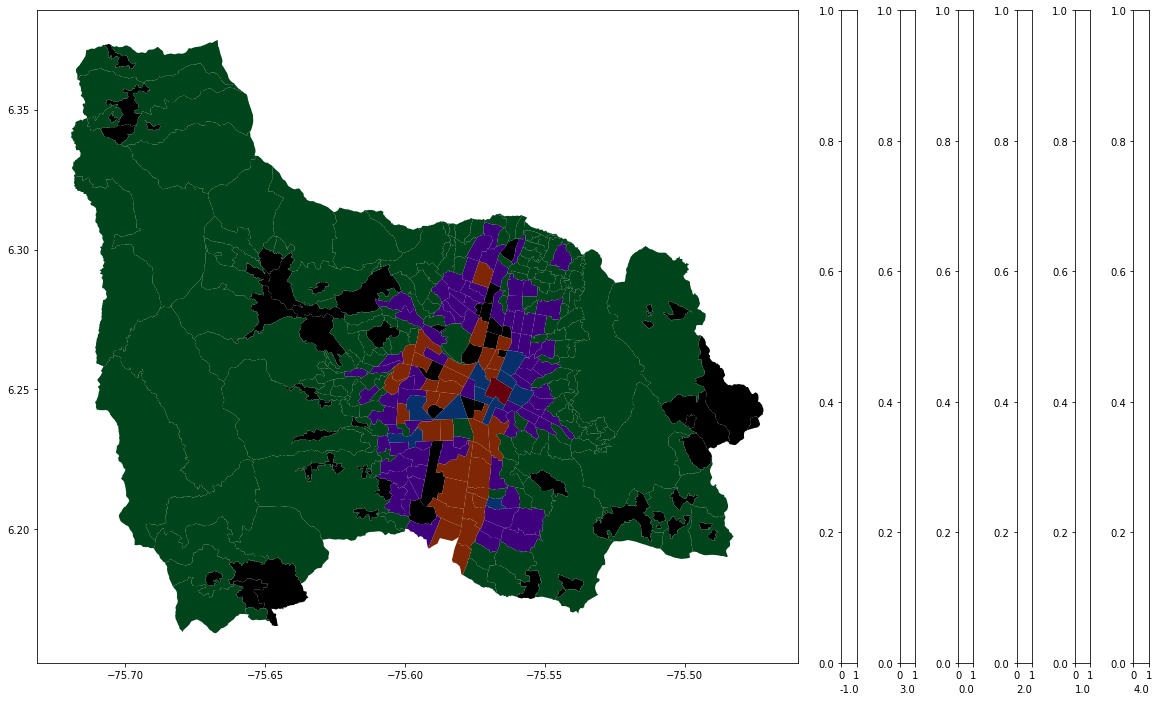

In [101]:
# Map parties with colors
parties = {
    -1.0: 'binary_r',
    3.0: 'Purples_r',
    .0: 'Greens_r',
    2.0: 'Oranges_r',
    1.0: 'Reds_r',
    4.0: 'Blues_r'
    }

gdf['margin'] = np.ones(len(gdf))

fig, ax = plt.subplots(figsize=(25, 12))
divider = make_axes_locatable(ax)

for cluster, color in parties.items():

    cax = divider.append_axes('right', size='2%', pad=0.6)
    cax.set_xlabel(cluster)

    gdf[gdf.cluster == cluster].plot(column='margin', cmap=color,
                                     legend=False, ax=ax, cax=cax)
plt.show()

# Método del codo

El método del codo es un método heurístico para seleccionar el número de clusters en el dataset, este consiste en graficar la inercia vs el número de clusters y elegir el valor del cluster que esta en el codo de la curva.

Un buen modelo es uno con baja inercia y un bajo número de conglomerados (K).

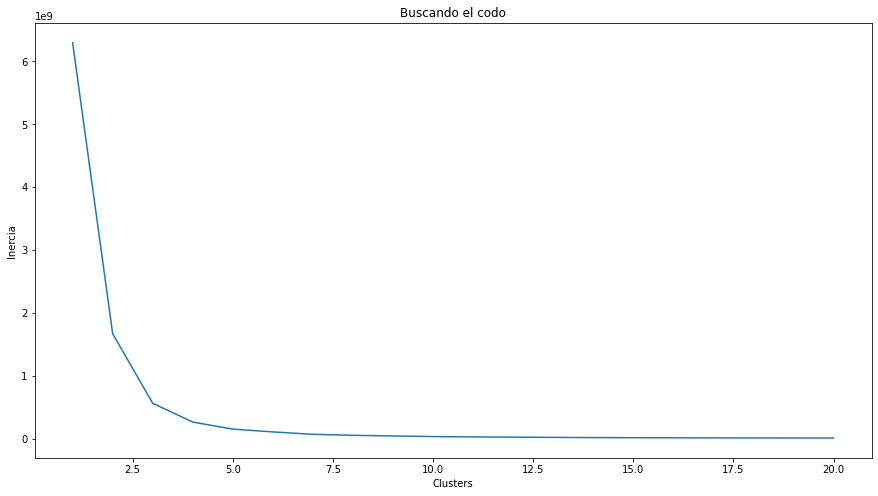

In [103]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=list(range(1, 21)), y=clusters, ax=ax)
ax.set_title('Buscando el codo')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inercia')

plt.show()

En la gráfica de arriba se observa que el codo de la curva se encuentra cuando hay 2 o 3 clusters.

A continuación se grafican las dos opciones incluyendo uno con mas clusters para observar las diferencias.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



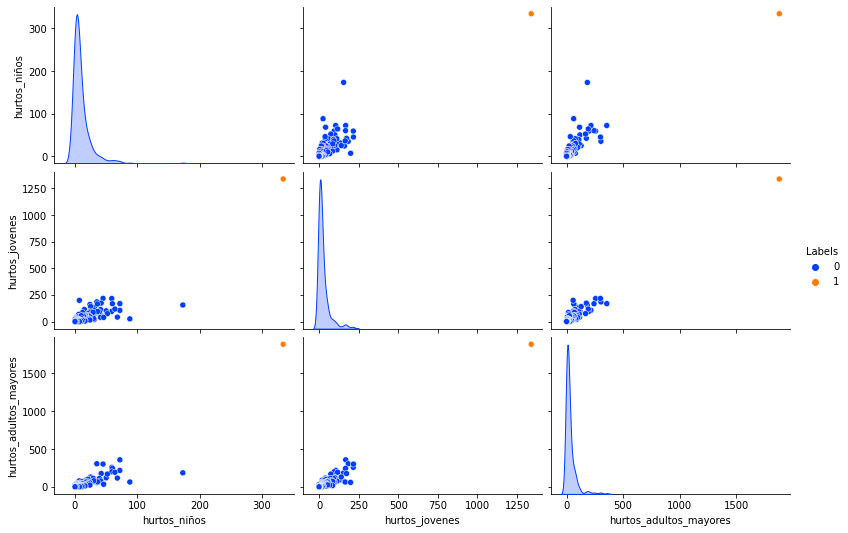

In [115]:
# 2 clusters
km2 = KMeans(n_clusters=2).fit(X)

X['Labels'] = km2.labels_
sns.pairplot(X[['hurtos_niños', 'hurtos_jovenes', 'hurtos_adultos_mayores', 'Labels']], hue='Labels', aspect=1.5, palette='bright')
plt.show()

Con 2 clusters se puede observar claramente la división.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



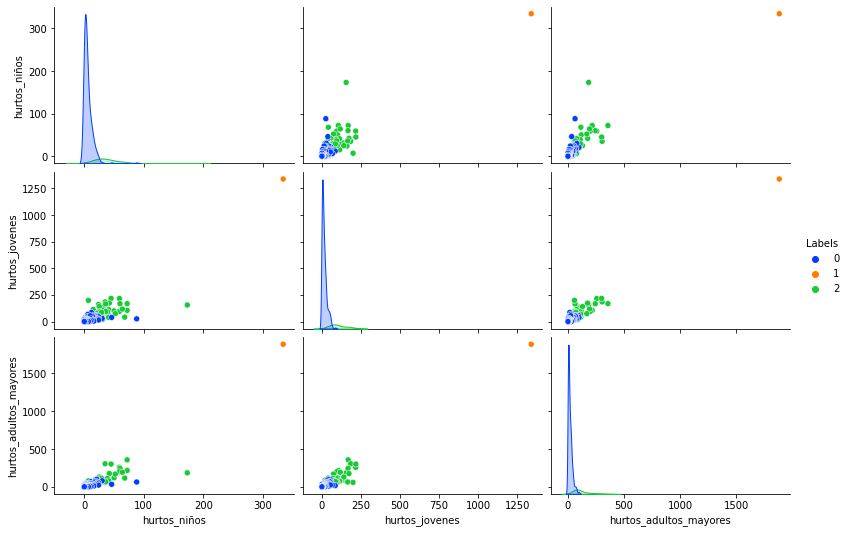

In [114]:
# 3 clusters
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
sns.pairplot(X[['hurtos_niños', 'hurtos_jovenes', 'hurtos_adultos_mayores', 'Labels']], hue='Labels', aspect=1.5, palette='bright')
plt.show()

Con 3 clusters la división sigue siendo clara.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



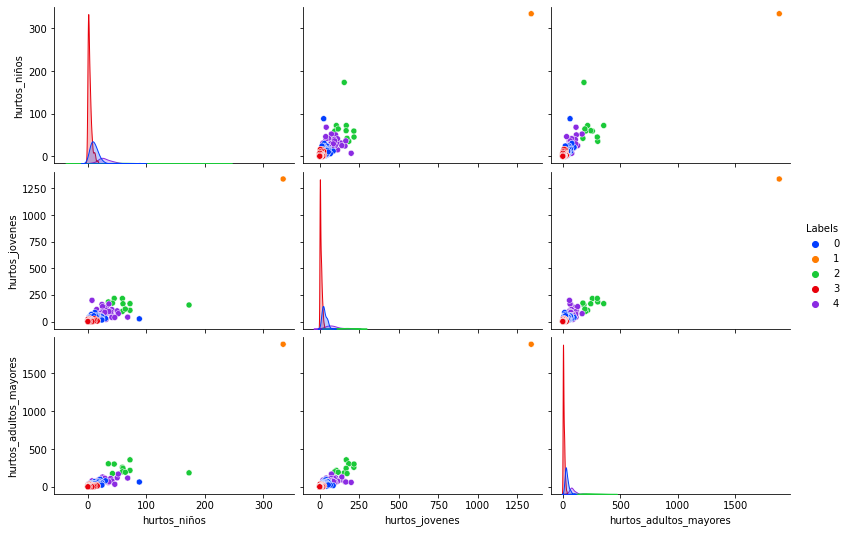

In [113]:
# 5 clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
sns.pairplot(X[['hurtos_niños', 'hurtos_jovenes', 'hurtos_adultos_mayores', 'Labels']], hue='Labels', aspect=1.5, palette='bright')
plt.show()

Con 5 clusters la división ya no es tan clara, hay clasificaciones que se solapan.

# Encontrar el feature más importante

In [119]:
import shap

X = X.drop('Labels', axis=1)
explainer = shap.Explainer(loaded_model.predict, X)
shap_values = explainer(X)

Streaming output truncated to the last 5000 lines.
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fitted without feature names
X has feature names, but KMeans was fit

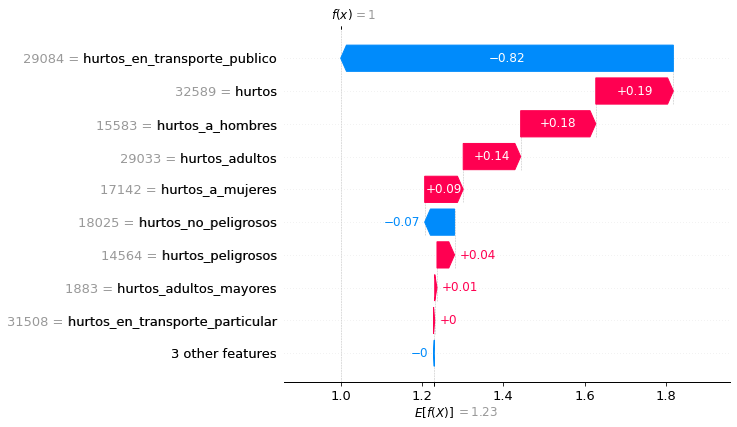

In [120]:
shap.plots.waterfall(shap_values[0])

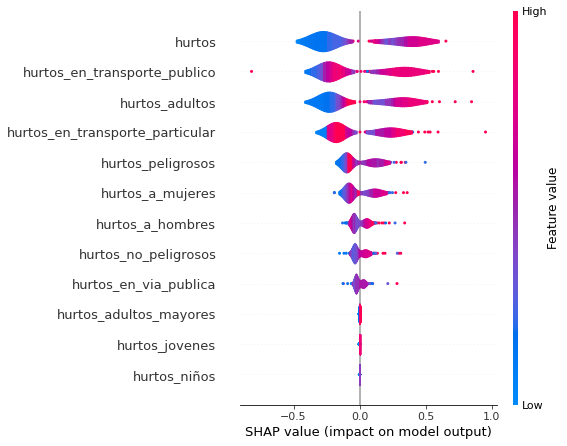

In [121]:
shap.summary_plot(shap_values, plot_type = 'violin')

De acuerdo a las anteriores gráficas los hurtos en el transporte público y los hurtos a los adultos son los features más importantes.

# ****Conclusión del modelo****

1. Al correr el modelo se obtuvo un mapa en el cual  se puede observar la clasificación que hizo el algoritmo de los diferentes barrios y corregimientos de Medellín.
2. Haciendo uso del método del codo se encontró que el número de clusters para nuestro modelo está entre 2 y 3.
3. Los features más importantes son los hurtos en el transporte público y los hurtos a las personas adultas.